# Initialization

# Weight Initialization Techniques for Deep Networks

Weight initialization is crucial in deep neural networks as it influences convergence speed and overall performance. Proper initialization helps prevent issues such as vanishing or exploding gradients. Choosing the right initialization technique is critical for effective training, particularly as networks become deeper and more complex.

Below are the main techniques:

## 1. Zero Initialization
**Method:** Initialize all weights to zero.  
**Problem:** If all weights are initialized to zero, each neuron in every layer performs the same computation during forward and backward propagation, leading to symmetry. As a result, the network fails to learn effectively because all neurons in each layer update their weights identically.

## 2. Random Initialization
**Method:** Initialize weights randomly using a uniform or normal distribution.  
**Goal:** Break symmetry so neurons learn different features.  
**Problem:** If weights are too large, activations can become very large, leading to exploding gradients. If weights are too small, activations can become very small, leading to vanishing gradients, making learning difficult.

## 3. Xavier Initialization (Glorot Initialization)
**Method:** Initialize weights using a distribution with zero mean and variance $\text{Var}(W) = \frac{1}{n_{\text{in}}}$ or $\text{Var}(W) = \frac{2}{n_{\text{in}} + n_{\text{out}}}$, where $n_{\text{in}}$ is the number of input units and $n_{\text{out}}$ is the number of output units.  
**Goal:** Ensure that the variance of the outputs of each layer is approximately the same as the variance of its inputs, helping maintain the signal throughout the network, thus avoiding vanishing/exploding gradients.  
**Best For:** Tanh and sigmoid activation functions.

## 4. He Initialization (Kaiming Initialization)
**Method:** Initialize weights using a distribution with variance $\text{Var}(W) = \frac{2}{n_{\text{in}}}$.  
**Goal:** Designed to work well with ReLU and its variants. This method accounts for the fact that ReLU neurons activate (i.e., are non-zero) only about 50% of the time, requiring larger variance.  
**Best For:** ReLU and its variants (e.g., Leaky ReLU).

## 5. LeCun Initialization
**Method:** Similar to Xavier, but with variance $\text{Var}(W) = \frac{1}{n_{\text{in}}}$.  
**Goal:** Tailored for activation functions like SELU, designed to self-normalize.  
**Best For:** SELU activation functions.

## 6. Orthogonal Initialization
**Method:** Initialize weight matrices using orthogonal matrices, achievable via Singular Value Decomposition (SVD) of a randomly generated matrix.  
**Goal:** Maintain variance of activations across layers, crucial for very deep networks.  
**Best For:** Recurrent Neural Networks (RNNs) and deep architectures where preserving the input signal is essential.

## 7. Custom Initializations (Layer-Specific)
**Method:** Some networks might benefit from custom initializations, depending on the architecture. For instance, initializing certain layers differently based on their role in the network (e.g., using smaller weights for deeper layers).  
**Goal:** Fine-tune initialization for specific tasks or architectures.

## Summary
- **Zero Initialization:** Not recommended due to symmetry breaking issues.
- **Random Initialization:** Requires careful selection of range/variance.
- **Xavier Initialization:** Suitable for tanh and sigmoid activations.
- **He Initialization:** Best for ReLU and its variants.
- **LeCun Initialization:** Ideal for SELU activations.
- **Orthogonal Initialization:** Useful for preserving variance across deep layers, especially in RNNs.

## 1 - Neural Network model 

You will use a 3-layer neural network (already implemented for you). Here are the initialization methods you will experiment with:  
- *Zeros initialization* --  setting `initialization = "zeros"` in the input argument.
- *Random initialization* -- setting `initialization = "random"` in the input argument. This initializes the weights to large random values.  
- *He initialization* -- setting `initialization = "he"` in the input argument. This initializes the weights to random values scaled according to a paper by He et al., 2015. 

**Instructions**: Please quickly read over the code below, and run it. In the next part you will implement the three initialization methods that this `model()` calls.

## 2 - Zero initialization

There are two types of parameters to initialize in a neural network:
- the weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- the bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

**Exercise**: Implement the following function to initialize all parameters to zeros. You'll see later that this does not work well since it fails to "break symmetry", but lets try it anyway and see what happens. Use np.zeros((..,..)) with the correct shapes.

The model is predicting 0 for every example. 

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, and you might as well be training a neural network with $n^{[l]}=1$ for every layer, and the network is no more powerful than a linear classifier such as logistic regression. 

>**What you should remember**:
>- The weights $W^{[l]}$ should be initialized randomly to break symmetry. 
>- It is however okay to initialize the biases $b^{[l]}$ to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly. 


## Xavier initialization


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Fully connected layer (input: 784, output: 128)
        self.fc2 = nn.Linear(128, 64)   # Fully connected layer (input: 128, output: 64)
        self.fc3 = nn.Linear(64, 10)    # Fully connected layer (input: 64, output: 10)

        # Apply Xavier initialization
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the output of the first layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation to the output of the second layer
        x = self.fc3(x)          # Output layer
        return x

# Create an instance of the network
model = SimpleNN()

# Example input
input_tensor = torch.randn(1, 784)

# Forward pass
output = model(input_tensor)
print(output)


tensor([[-0.7598, -0.2424,  1.5024, -0.0970,  1.4350,  0.8894, -0.1437,  0.1174,
         -1.0093, -0.7497]], grad_fn=<AddmmBackward0>)


## Random initialization

To break symmetry, lets intialize the weights randomly. Following random initialization, each neuron can then proceed to learn a different function of its inputs. In this exercise, you will see what happens if the weights are intialized randomly, but to very large values. 

**Exercise**: Implement the following function to initialize your weights to large random values (scaled by \*10) and your biases to zeros. Use `np.random.randn(..,..) * 10` for weights and `np.zeros((.., ..))` for biases. We are using a fixed `np.random.seed(..)` to make sure your "random" weights  match ours, so don't worry if running several times your code gives you always the same initial values for the parameters. 

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 50)  # Fully connected layer (10 -> 50)
        self.fc2 = nn.Linear(50, 20)  # Fully connected layer (50 -> 20)
        self.fc3 = nn.Linear(20, 1)   # Fully connected layer (20 -> 1)

        # Apply random initialization to weights
        self.apply(self._init_weights)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

    def _init_weights(self, layer):
        if isinstance(layer, nn.Linear):
            nn.init.normal_(layer.weight, mean=0.0, std=1.0)  # Random normal initialization
            nn.init.constant_(layer.bias, 0)  # Initialize biases to zero

# Create an instance of the network
model = SimpleNN()

# Print the initialized weights and biases of the first layer
print("Weights of the first layer:", model.fc1.weight)
print("Biases of the first layer:", model.fc1.bias)


Weights of the first layer: Parameter containing:
tensor([[ 2.4738e-01,  1.0741e-01,  7.3833e-02,  1.7492e+00, -6.1805e-01,
          8.2370e-01,  1.2449e+00,  4.2389e-01,  1.0911e+00,  1.1905e+00],
        [ 5.0406e-01, -1.6414e+00, -1.8465e-02, -6.7157e-01, -6.1897e-01,
         -1.3121e+00, -1.2527e+00,  5.7761e-01,  1.1591e+00,  1.3779e+00],
        [-7.6910e-02, -2.9013e-01, -1.5574e-01, -1.4871e+00, -8.5508e-01,
         -1.5233e+00,  1.1853e+00, -1.2545e+00,  5.4780e-01, -1.0406e+00],
        [ 1.2977e+00,  1.0952e+00, -3.5565e-01,  4.4473e-01, -3.9502e-01,
          3.4125e-01, -4.8433e-01,  1.4705e+00,  2.6437e-01, -8.9548e-02],
        [ 1.6065e-01,  7.8690e-01, -1.8365e+00, -6.0202e-01, -1.8886e+00,
         -4.2463e-01, -8.7001e-01, -1.3984e+00, -1.9412e+00, -1.4557e+00],
        [-5.5558e-01, -1.3261e+00,  1.6025e+00,  4.0271e-02,  9.5612e-01,
          1.1425e+00, -6.5658e-01,  1.5952e+00,  2.0885e-01,  4.6444e-01],
        [ 1.8130e-01,  9.5424e-01,  5.6673e-01,  1.1100e

Epoch 1/100, Loss: 0.2860
Epoch 2/100, Loss: 0.2623
Epoch 3/100, Loss: 0.2384
Epoch 4/100, Loss: 0.2223
Epoch 5/100, Loss: 0.2064
Epoch 6/100, Loss: 0.1945
Epoch 7/100, Loss: 0.1839
Epoch 8/100, Loss: 0.1736
Epoch 9/100, Loss: 0.1648
Epoch 10/100, Loss: 0.1572
Epoch 11/100, Loss: 0.1508
Epoch 12/100, Loss: 0.1478
Epoch 13/100, Loss: 0.1439
Epoch 14/100, Loss: 0.1389
Epoch 15/100, Loss: 0.1346
Epoch 16/100, Loss: 0.1340
Epoch 17/100, Loss: 0.1293
Epoch 18/100, Loss: 0.1277
Epoch 19/100, Loss: 0.1243
Epoch 20/100, Loss: 0.1195
Epoch 21/100, Loss: 0.1187
Epoch 22/100, Loss: 0.1157
Epoch 23/100, Loss: 0.1143
Epoch 24/100, Loss: 0.1144
Epoch 25/100, Loss: 0.1078
Epoch 26/100, Loss: 0.1069
Epoch 27/100, Loss: 0.1063
Epoch 28/100, Loss: 0.1055
Epoch 29/100, Loss: 0.1006
Epoch 30/100, Loss: 0.1025
Epoch 31/100, Loss: 0.1009
Epoch 32/100, Loss: 0.1003
Epoch 33/100, Loss: 0.0982
Epoch 34/100, Loss: 0.0970
Epoch 35/100, Loss: 0.0934
Epoch 36/100, Loss: 0.0956
Epoch 37/100, Loss: 0.0918
Epoch 38/1

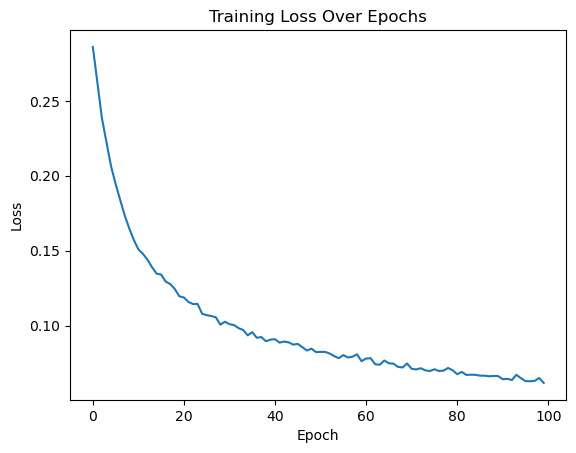

Prediction for [[ 1. -1.]]: 0.4066


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Step 1: Generate a synthetic dataset
# We'll create a simple binary classification dataset

# Generate random data points
X = torch.randn(1000, 2)  # 1000 samples, 2 features
# Create labels (0 or 1) based on a simple linear function with noise
y = (X[:, 0] + X[:, 1] > 0).float().reshape(-1, 1)

# Step 2: Create a DataLoader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Step 3: Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Sigmoid for binary classification
        return x

# Initialize the model
model = SimpleNN()

# Step 4: Initialize weights with random values
def initialize_weights_random(model):
    for layer in model.children():
        if isinstance(layer, nn.Linear):
            nn.init.normal_(layer.weight, mean=0.0, std=1.0)
            nn.init.constant_(layer.bias, 0)

initialize_weights_random(model)

# Step 5: Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 6: Train the model
num_epochs = 100
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, labels in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    # Record and print the average loss for each epoch
    average_loss = epoch_loss / len(dataloader)
    losses.append(average_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}')

# Step 7: Plot the training loss over epochs
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

# Step 8: Test the model on a new synthetic sample
with torch.no_grad():
    test_sample = torch.tensor([[1.0, -1.0]])  # Example test input
    prediction = model(test_sample)
    print(f'Prediction for {test_sample.numpy()}: {prediction.item():.4f}')


If you see "inf" as the cost after the iteration 0, this is because of numerical roundoff; a more numerically sophisticated implementation would fix this. But this isn't worth worrying about for our purposes. 

Anyway, it looks like you have broken symmetry, and this gives better results. than before. The model is no longer outputting all 0s. 

**Observations**:
- The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. Indeed, when $\log(a^{[3]}) = \log(0)$, the loss goes to infinity.
- Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm. 
- If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.

> In summary:
>- Initializing weights to very large random values does not work well. 
>- Hopefully intializing with small random values does better. The important question is: how small should be these random values be? Lets find out in the next part! 

## 4 - He initialization

Finally, try "He Initialization"; this is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)  # First fully connected layer
        self.fc2 = nn.Linear(256, 128)  # Second fully connected layer
        self.fc3 = nn.Linear(128, 10)   # Output layer

        # Apply He initialization to all layers
        self.apply(self._initialize_weights)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def _initialize_weights(self, layer):
        if isinstance(layer, nn.Linear):
            nn.init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
            if layer.bias is not None:
                nn.init.constant_(layer.bias, 0)

# Create the network instance
model = SimpleNN()

# Example input: a batch of images with 784 features (e.g., 28x28 pixels flattened)
example_input = torch.randn(64, 784)

# Forward pass through the network
output = model(example_input)
print(output.shape)  # Expected output shape: (64, 10)


torch.Size([64, 10])


## 5 - Conclusions

>**What you should remember from this notebook**:
>- Different initializations lead to different results
>- Random initialization is used to break symmetry and make sure different hidden units can learn different things
>- Don't intialize to values that are too large
>- He initialization works well for networks with ReLU activations. 